# **Star classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I load the data from a csv file downloaded from: https://www.kaggle.com/datasets/deepu1109/star-dataset/data. There are seven characteristics for each star: temperature, luminosity, radius, absolute magnitude, star color, spectral class and star type.

I will be classifying the stars according to their star types:

0 - Brown Dwarf

1 - Red Dwarf

2 - White Dwarf

3 - Main Sequence

4 - Supergiant

5 - Hypergiant

In [2]:
data = pd.read_csv('data.csv')
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
data = data.drop('Star color', axis = 1)
data = data.drop('Spectral Class', axis = 1)
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0
...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5
236,30839,834042.000000,1194.0000,-10.63,5
237,8829,537493.000000,1423.0000,-10.73,5
238,9235,404940.000000,1112.0000,-11.23,5


### **Inspecting the dataset**

I visualize the data graphically, to inspect them and see how individual parameters correlate 

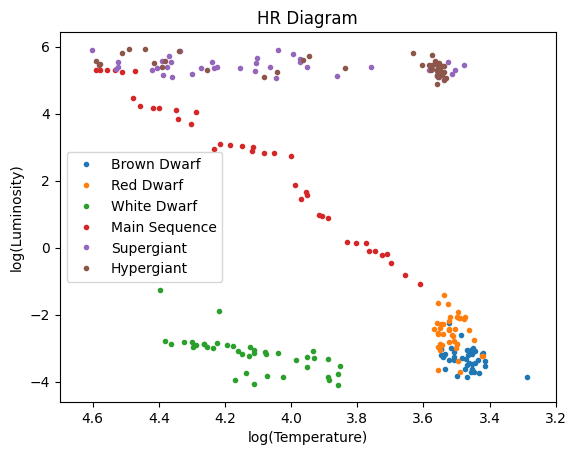

In [4]:
st_0 = data["Star type"] == 0
st_1 = data["Star type"] == 1
st_2 = data["Star type"] == 2
st_3 = data["Star type"] == 3
st_4 = data["Star type"] == 4
st_5 = data["Star type"] == 5

types = [st_0, st_1, st_2, st_3, st_4, st_5]
labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']

for i in range(len(types)):
    a = types[i]
    b = labels[i]
    plt.plot(np.log10(data.loc[a, 'Temperature (K)']), np.log10
             (data.loc[a, 'Luminosity(L/Lo)']), ".", label=b)

plt.xlabel("log(Temperature)")
plt.xlim(4.7, 3.2)
plt.ylabel("log(Luminosity)")
plt.title('HR Diagram')
plt.legend();

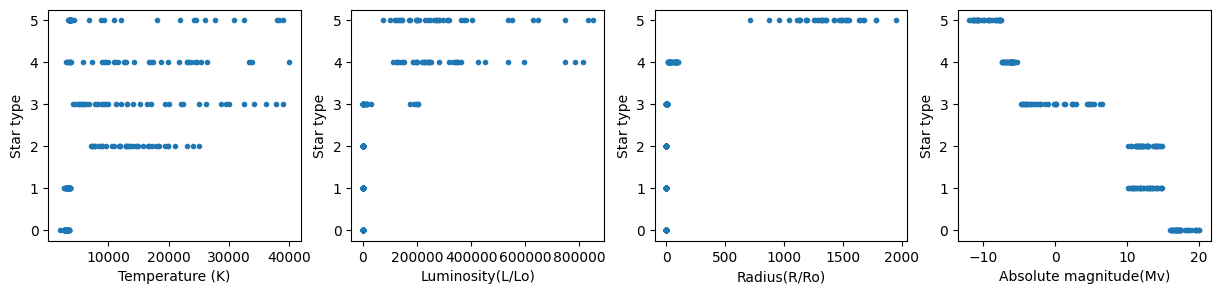

In [5]:
plt.figure(figsize=(15,3))

x = 0
columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

for i in range(4):
    x += 1
    c = columns[i]
    plt.subplot(1,4,x)
    plt.plot(data[c], data['Star type'], ".")
    plt.xlabel(c)
    plt.ylabel('Star type')

### **Correlation between parameters - Heatmap**

In [6]:
import seaborn as sns

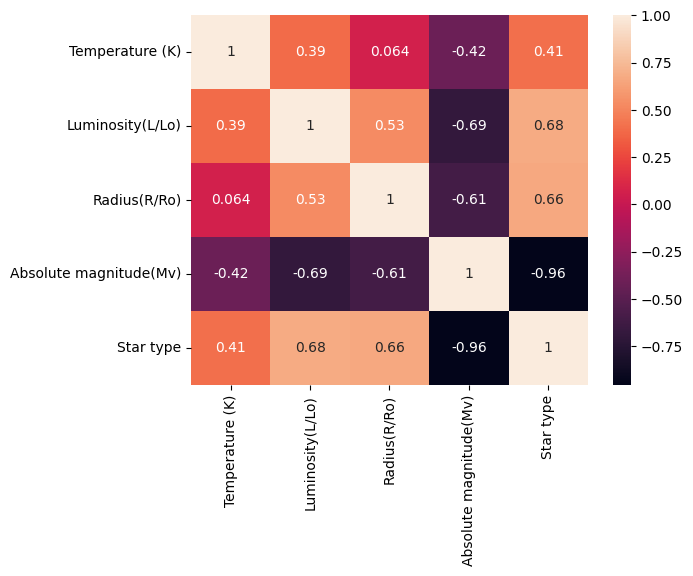

In [7]:
corr_matrix = np.corrcoef([data['Temperature (K)'], data['Luminosity(L/Lo)'], 
                           data['Radius(R/Ro)'], data['Absolute magnitude(Mv)'], data['Star type']])

columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']

sns.heatmap(corr_matrix, annot=True,
           xticklabels = columns,
            yticklabels = columns)
plt.show()

The correlation coefficient can range from 1 to -1. A correlation coefficient of 1 indicates a strong positive relationship (as one variable increases, the other also increases), while a correlation coefficient of -1 indicates a strong negative relationship (meaning that as one variable increases, the other decreases). A correlation coefficient of 0 indicates no relationship between the two variables.

The most important part of the heatmap is its last row (or similarly its last column), which indicates the relationship between the individual parameters and the type of star. The strongest correlation is with the absolute magnitude, which means, that this parameter will be a deciding factor in the model.

### **Splitting the data**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

I will divide the data into training set and testing set. The training set is used to train the model - all the parameters along with the labels for the data are fed into the model to train it to predict star typws. The training data is then used to evaluate how accurate the prediction of the model is.

In [9]:
X = data.drop('Star type', axis=1)
y = data['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=501)
# test_size controls how large a sample of the data is used for training (20%)
# random_state parameter may be provided to control the random number generator used - an integer is provided to produce the same result

### **Defining and evaluating the model**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [11]:
rf = RandomForestClassifier(n_estimators = 50,
                           max_depth= 4)
# n_estimators denotes how many trees are in the forest
# max_depth denotes the maximum depth of the tree

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [12]:
y_pred = rf.predict(X_test)

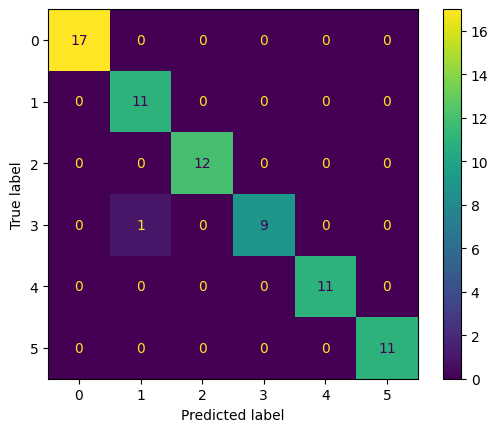

In [13]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        12
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.98        72
weighted avg       0.99      0.99      0.99        72



1. Precision: Percentage of correct positive predictions relative to total positive predictions.
2. Recall: Percentage of correct positive predictions relative to total actual positives.
3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
4. Support: These values tell us how many stars belonged to each class in the test dataset.

### **Visualisation of several Trees in Random Forest**

In [15]:
from sklearn.tree import plot_tree

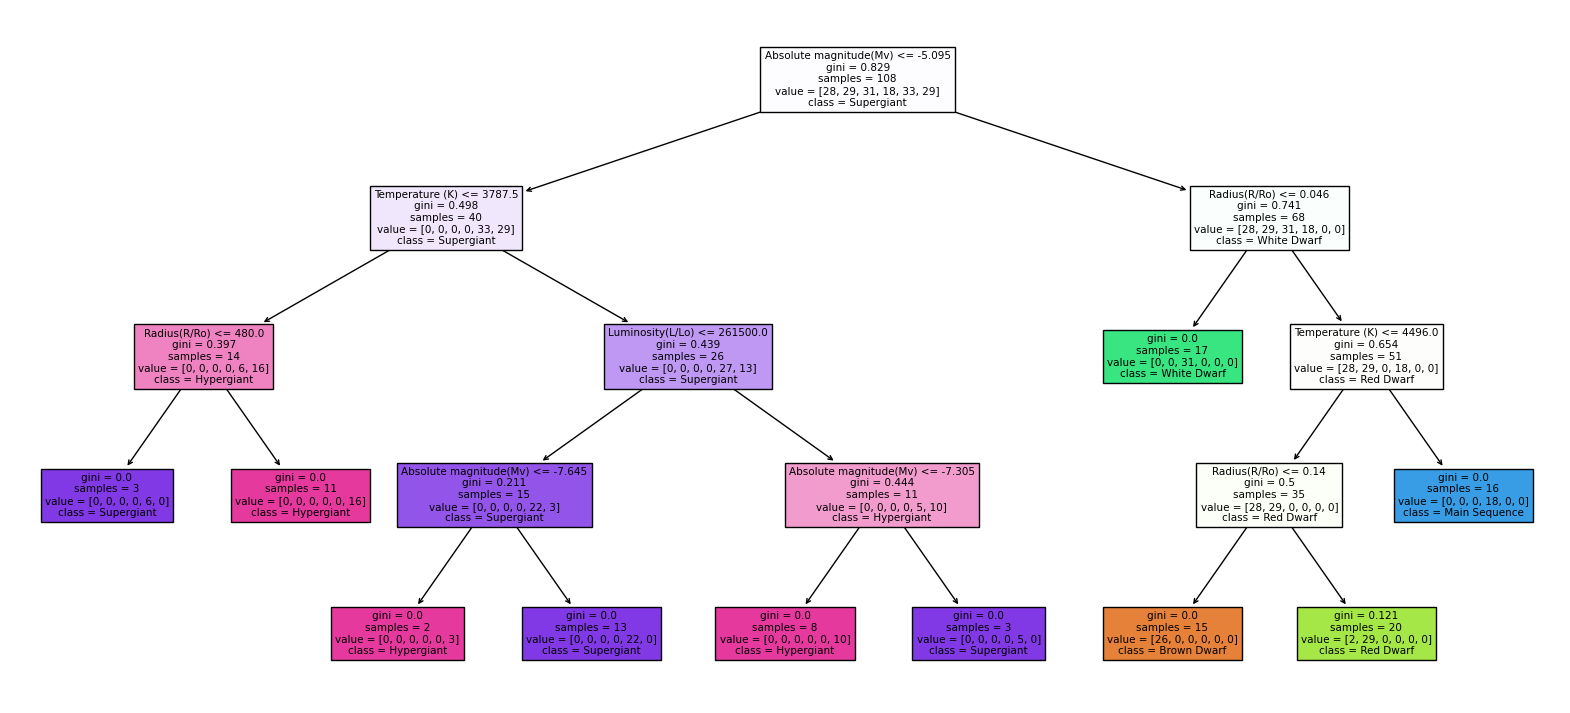

In [16]:
fig, ax = plt.subplots(figsize=(20,9))

plot_tree(rf.estimators_[0],
        feature_names=X.columns,
        class_names=labels,
        filled=True,
        ax=ax);
# filled = True - When set to True, paint nodes to indicate majority
# class for classification, extremity of values for regression, or purity of node for multi-output

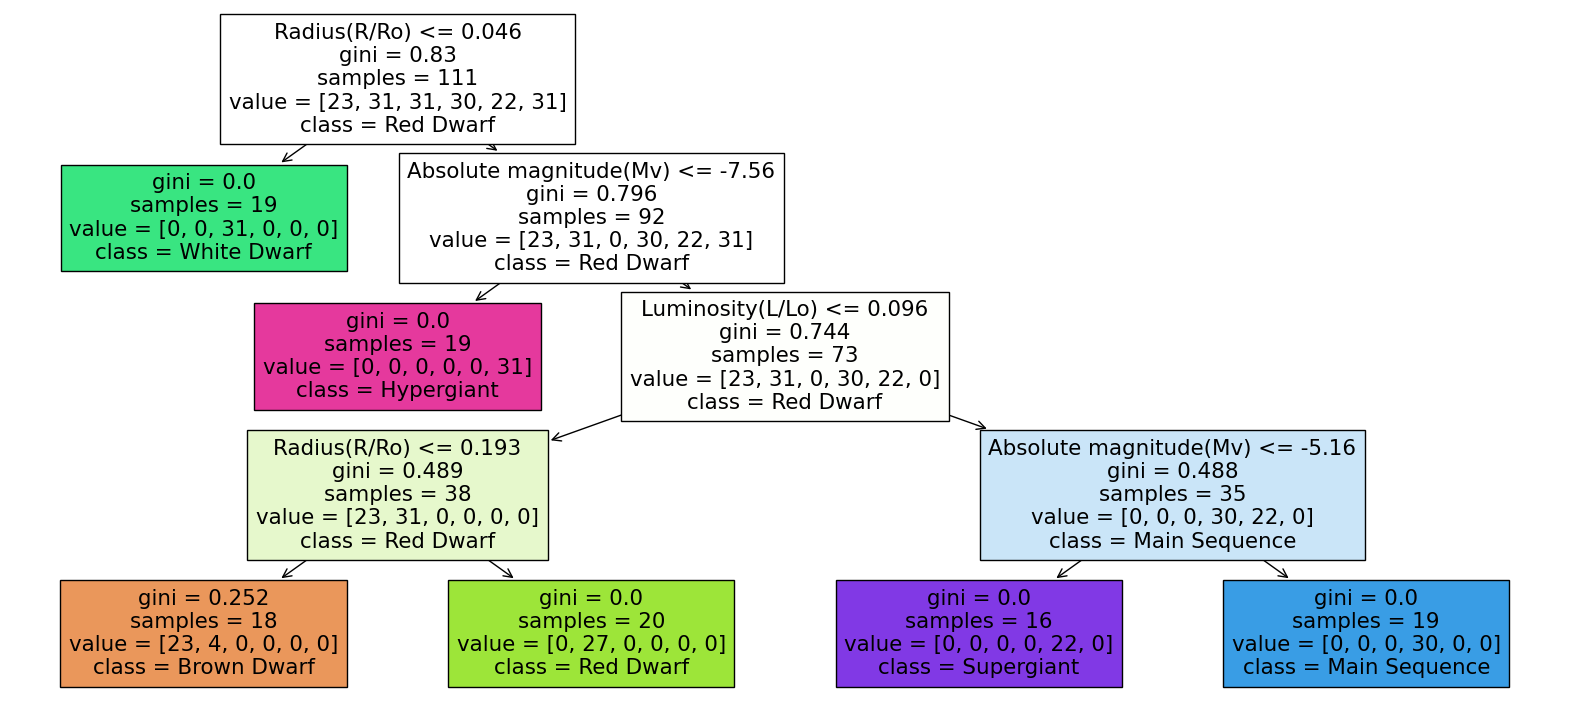

In [17]:
fig, ax = plt.subplots(figsize=(20,9))

plot_tree(rf.estimators_[1],
        feature_names=X.columns,
        class_names=labels,
        filled=True,
        ax=ax);

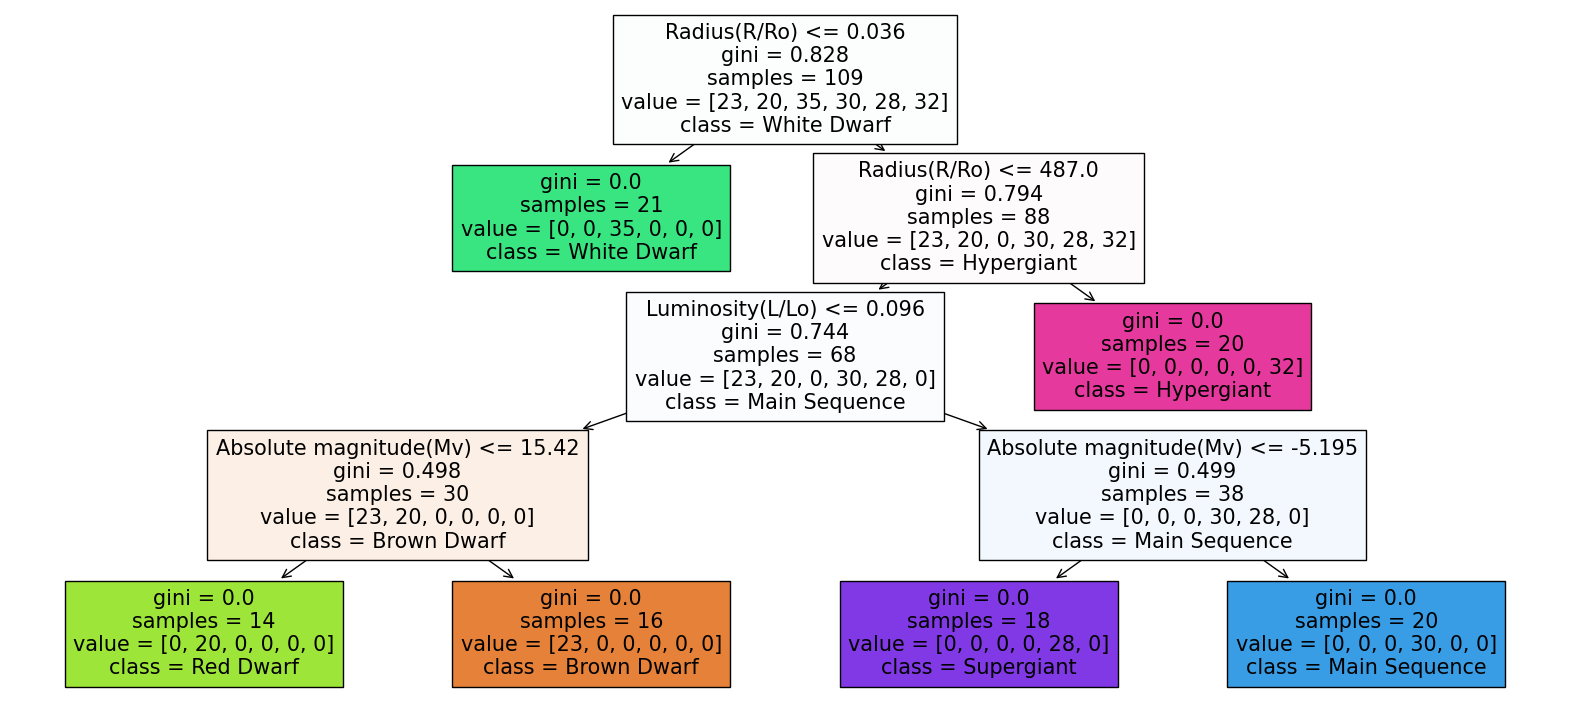

In [18]:
fig, ax = plt.subplots(figsize=(20,9))

plot_tree(rf.estimators_[2],
        feature_names=X.columns,
        class_names=labels,
        filled=True,
        ax=ax);

Each node contains several features:

Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. All the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes.

Value are indicating the number of sample by class that I have in the step.